In [1]:
import numpy as np
import re
import plotly
plotly.tools.set_credentials_file(username='sehowerter', api_key='G5Ogb7gUjjxyuw46SW2r')
plotly.tools.set_config_file(world_readable=False,
                             sharing='private')
import plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
import pandas as pd
import glob
import ternary
import datetime as dt
from matplotlib import rc
from matplotlib import rcParams
rcParams.update({
    'font.family':'sans-serif',
    'font.sans-serif':['Liberation Sans'],
    })

rcParams.update({
    'font.family':'serif',
    'font.sans-serif':['Palatino'],
    })
#rc(‘font’,**{‘family’:‘sans-serif’,‘sans-serif’:[‘Helvetica’]})
## for Palatino and other serif fonts use:
rc('font',**{'family':'sans-serif','serif':['Times New Roman']})
rc('text', usetex=False)

import matplotlib.font_manager


# Getting all ratios into one dataframe

In [2]:
allratios = pd.DataFrame(columns = ['user','tweet_id','happ_score', 'happ_words', 'likes', 'replies',
       'retweets', 'scrape_date', 'total_words', 'tweet_date','url'])
allratiofiles = glob.glob('ratios/*')
#print('All of the users we have ratios & tweet reply conversations for:')
for file in allratiofiles:
    sname = re.search('(?<=ratios/).*(?=-ratios.csv)',file).group(0)
    #print(sname)
    rdf = pd.read_csv(file)
    rdf = rdf.drop("Unnamed: 0",axis=1)
    rdf = rdf.dropna(axis=0, how='any')
    rdf['user'] = sname
    allratios = pd.concat([allratios,rdf],ignore_index=True)

for tID in list(allratios['tweet_id']):
    subset = allratios.loc[allratios['tweet_id'] == tID]
    if len(subset.index) == 2:
        hapwords = subset['happ_words']
        drop = subset.index[subset['happ_words']== min(hapwords)]
        allratios = allratios.drop(drop, axis=0)
    elif len(subset.index) > 2:
        pass
        print('dulicate tweet! ',list(subset.index))
        
    
for i in allratios.index:
    try:
        allratios.loc[i,'replies'] = float(allratios.loc[i,'replies'])
    except:
        allratios.loc[i,'replies'] = float(allratios.loc[i,'replies'][:-1])*1000
    if allratios.loc[i,'happ_words'] < 200:
        allratios.loc[i,'happ_score'] = np.nan
        
allratios['norm_replies'] = allratios['replies']/(allratios['replies'] + allratios['retweets'] + allratios['likes'])
allratios['norm_likes'] = allratios['likes']/(allratios['replies'] + allratios['retweets'] + allratios['likes'])
allratios['norm_retweets'] = allratios['retweets']/(allratios['replies'] + allratios['retweets'] + allratios['likes'])
       
        
# Subsetting to plot all tweet ratios
allhapp_ratios = allratios[['retweets','replies','likes','happ_score','user','tweet_id']]
allwords_ratios = allratios[['retweets','replies','likes','happ_words','user']]
allhapp_ratios = allhapp_ratios.T.to_dict().values()
allwords_ratios = allwords_ratios.T.to_dict().values()
'''
allratios['tweet'] = ""
tweetfiles = glob.glob('tweet_convos/{}/*'.format(screenname))
for i in allratios.index:
    file = [f for f in tweetfiles if str(allratios.loc[i,'tweet_id']) in str(f)]
    #print(file)
    for f in file:
        if 'convo-' in f:
            pass
        else:
            tweetstring = open(f,'r',encoding = 'utf-8')
            allratios.loc[i,'tweet'] = tweetstring.read()
'''
#allratios

dulicate tweet!  [10026, 10509, 10636]
dulicate tweet!  [10027, 10510, 10637]
dulicate tweet!  [10028, 10511, 10638]
dulicate tweet!  [10029, 10512, 10639]
dulicate tweet!  [10030, 10513, 10640]
dulicate tweet!  [10031, 10514, 10641]
dulicate tweet!  [10032, 10515, 10642]
dulicate tweet!  [10033, 10516, 10643]
dulicate tweet!  [10034, 10517, 10644]
dulicate tweet!  [10035, 10518, 10645]
dulicate tweet!  [10036, 10519, 10646]
dulicate tweet!  [10037, 10520, 10647]
dulicate tweet!  [10038, 10521, 10648]
dulicate tweet!  [10039, 10522, 10649]
dulicate tweet!  [10040, 10523, 10650]
dulicate tweet!  [10041, 10524, 10651]
dulicate tweet!  [10042, 10525, 10652]
dulicate tweet!  [10043, 10526, 10653]
dulicate tweet!  [10044, 10528, 10655]
dulicate tweet!  [10045, 10529, 10656]
dulicate tweet!  [10046, 10530, 10657]
dulicate tweet!  [10047, 10531, 10658]
dulicate tweet!  [10048, 10532, 10659]
dulicate tweet!  [10049, 10533, 10660]
dulicate tweet!  [10050, 10534, 10661]
dulicate tweet!  [10051, 

dulicate tweet!  [10129, 10615, 10741]
dulicate tweet!  [10130, 10616, 10742]
dulicate tweet!  [10131, 10617, 10743]
dulicate tweet!  [10132, 10618, 10744]
dulicate tweet!  [10133, 10619, 10745]
dulicate tweet!  [10134, 10620, 10746]
dulicate tweet!  [10135, 10621, 10747]
dulicate tweet!  [10136, 10622, 10748]
dulicate tweet!  [10137, 10623, 10749]
dulicate tweet!  [10138, 10624, 10750]
dulicate tweet!  [10139, 10625, 10751]
dulicate tweet!  [10140, 10626, 10752]
dulicate tweet!  [10141, 10627, 10753]
dulicate tweet!  [10143, 10628, 10755]
dulicate tweet!  [10144, 10629, 10756]
dulicate tweet!  [10145, 10630, 10757]
dulicate tweet!  [10146, 10631, 10758]
dulicate tweet!  [10147, 10632, 10759]
dulicate tweet!  [10148, 10633, 10760]
dulicate tweet!  [10149, 10634, 10761]
dulicate tweet!  [10150, 10635, 10762]
dulicate tweet!  [10026, 10509, 10636]
dulicate tweet!  [10027, 10510, 10637]
dulicate tweet!  [10028, 10511, 10638]
dulicate tweet!  [10029, 10512, 10639]
dulicate tweet!  [10030, 

'\nallratios[\'tweet\'] = ""\ntweetfiles = glob.glob(\'tweet_convos/{}/*\'.format(screenname))\nfor i in allratios.index:\n    file = [f for f in tweetfiles if str(allratios.loc[i,\'tweet_id\']) in str(f)]\n    #print(file)\n    for f in file:\n        if \'convo-\' in f:\n            pass\n        else:\n            tweetstring = open(f,\'r\',encoding = \'utf-8\')\n            allratios.loc[i,\'tweet\'] = tweetstring.read()\n'

## Finding the most and least happy tweet convo

In [3]:
happmin = min(list(allratios['happ_score']))
happmax = max(list(allratios['happ_score']))   
screenname_least = allratios.loc[allratios.happ_score == happmin,'user'].item()
screenname_most = allratios.loc[allratios.happ_score ==happmax,'user'].item()
tweetid_least = allratios.loc[allratios.happ_score == happmin,'tweet_id'].item()
tweetid_most = allratios.loc[allratios.happ_score ==happmax,'tweet_id'].item()

print('least happy reply thread got a score of ',happmin,' from ',screenname_least,' @ ',str(allratios.loc[allratios.happ_score == happmin,'url'].item()))
print(' w/ a ratio of: R=',str(allratios.loc[allratios.happ_score == happmin,'replies'].item()),'; RT=',str(allratios.loc[allratios.happ_score == happmin,'retweets'].item()),'; L=',str(allratios.loc[allratios.happ_score == happmin,'likes'].item()),)
print('most happy reply thread got a score of ',happmax,' from ',screenname_most,' @ ',str(allratios.loc[allratios.happ_score == happmax,'url'].item()))
print(' w/ a ratio of: R=',str(allratios.loc[allratios.happ_score == happmax,'replies'].item()),'; RT=',str(allratios.loc[allratios.happ_score == happmax,'retweets'].item()),'; L=',str(allratios.loc[allratios.happ_score == happmax,'likes'].item()),)


least happy reply thread got a score of  4.622647058831807  from  marcorubio  @  http://twitter.com/marcorubio/status/986369469734940672
 w/ a ratio of: R= 461.0 ; RT= 8968 ; L= 10428
most happy reply thread got a score of  7.381280000003548  from  SenatorBaldwin  @  http://twitter.com/SenatorBaldwin/status/804804406495608834
 w/ a ratio of: R= 101.0 ; RT= 2521 ; L= 3768


# Plotting all tweet ratios with happiness

In [21]:
rawData = list(allhapp_ratios);
def makeAxis(title, tickangle): 
    return {
      'title': title,
      'titlefont': { 'size': 12 },
      'tickangle': tickangle,
      'tickfont': { 'size': 10 },
      'tickcolor': 'rgba(0,0,0,0)',
      'ticklen': 5,
      'showline': True,
      'showgrid': True
    }
data = [{ 
    'type': 'scatterternary',
    'mode': 'markers',
    'a': [i for i in map(lambda x: x['retweets'], rawData)],
    'b': [i for i in map(lambda x: x['replies'], rawData)],
    'c': [i for i in map(lambda x: x['likes'], rawData)],
    'text': [i for i in map(lambda x: x['user']+'<br>happ score = '+str(round(x['happ_score'],3)), rawData)],
    'marker': {
        'color': [i for i in map(lambda x: x['happ_score'], rawData)],
        'cmin':happmax,
        'cmax':happmin,
        'size': 4,
        'colorbar':{'title':'Happiness Score'
                   },
        'colorscale':'YlOrRd',# Viridis Jet YlOrRd
        'showscale':True
    },
    }]
layout = {
    'title':'Colored by Happiness Score of Reply Conversation',
    'titlefont': { 'size': 18 },
    'autosize':False,
    'width':900,
    'height':700,
    'ternary': {
        'sum': 1,
        'aaxis': makeAxis('Retweets', 0),
        'baxis': makeAxis('<br>Replies  ', 45),
        'caxis': makeAxis('<br>  Likes', -45)
    },
    'annotations': [{
      'showarrow': False,
      'text': 'Sample of Tweets:',
        'x': .5,
        'y': 1.19,
        'font': { 'size': 20 }
    }]
}
fig = {'data': data, 'layout': layout}
#py.plotly.image.save_as(fig,'Figs/{}-ratio-happiness.jpeg'.format(screenname))
py.offline.iplot(fig)

# Plotting agin to save fig at higher quality
rawData = list(allhapp_ratios);
def makeAxis(title, tickangle): 
    return {
      'title': title,
      'titlefont': { 'size': 24 },
      'tickangle': tickangle,
      'tickfont': { 'size': 20 },
      'tickcolor': 'rgba(0,0,0,0)',
      'ticklen': 5,
      'showline': True,
      'showgrid': True
    }
data = [{ 
    'type': 'scatterternary',
    'mode': 'markers',
    'a': [i for i in map(lambda x: x['retweets'], rawData)],
    'b': [i for i in map(lambda x: x['replies'], rawData)],
    'c': [i for i in map(lambda x: x['likes'], rawData)],
    'text': [i for i in map(lambda x: x['user']+'<br>happ score = '+str(round(x['happ_score'],3)), rawData)],
    'marker': {
        'color': [i for i in map(lambda x: x['happ_score'], rawData)],
        'cmin':happmax,
        'cmax':happmin,
        'size': 10,
        'colorbar':{'title':'Happiness Score',
                    'titlefont': { 'size': 30 },
                    'tickfont': { 'size': 20 },
                   },
        'colorscale':'YlOrRd',# Viridis Jet YlOrRd
        'showscale':True
    },
    }]
layout = {
    'title':'<br>Colored by Happiness Score of Reply Conversation',
    'titlefont': { 'size': 34 },
    'autosize':False,
    'width':2000,
    'height':1700,
    'ternary': {
        'sum': 1,
        'aaxis': makeAxis('Retweets', 0),
        'baxis': makeAxis('<br>Replies  ', 45),
        'caxis': makeAxis('<br>  Likes', -45)
    },
    'annotations': [{
      'showarrow': False,
      'text': 'Sample of All Tweets:',
        'x': .5,
        'y': 1.07,
        'font': { 'size': 44 }
    }]
}
fig = {'data': data, 'layout': layout}
py.plotly.image.save_as(fig,'Figs/ALL-ratio-happiness.jpeg')


In [5]:
ls ratios/

BBCBreaking-ratios.csv      SenJohnMcCain-ratios.csv
BarackObama-ratios.csv      SenJoniErnst-ratios.csv
BillCassidy-ratios.csv      SenKamalaHarris-ratios.csv
BillClinton-ratios.csv      SenRubioPress-ratios.csv
BillGates-ratios.csv        SenSanders-ratios.csv
ChrisCoons-ratios.csv       SenSchumer-ratios.csv
CillizzaCNN-ratios.csv      SenShelby-ratios.csv
Comey-ratios.csv            SenTedCruz-ratios.csv
Drake-ratios.csv            SenThadCochran-ratios.csv
EPAScottPruitt-ratios.csv   SenWarren-ratios.csv
FoxNews-ratios.csv          SenateGOP-ratios.csv
HillaryClinton-ratios.csv   SenateMajLdr-ratios.csv
InhofePress-ratios.csv      SenatorBaldwin-ratios.csv
JackKingston-ratios.csv     SenatorLeahy-ratios.csv
JerryMoran-ratios.csv       SenatorRounds-ratios.csv
JohnBoozman-ratios.csv      SenatorTester-ratios.csv
KatyTurNBC-ratios.csv       SenatorTomUdall-ratios.csv
KellyannePolls-ratios.csv   SenatorWicker-ratios.csv
KingJames-ratios.csv        SethAbramovitch-ratios.csv
LilTunech

# Comparing mulitple user's ratios (average ratio plot)

In [29]:
senators['norm_replies'] = senators['replies'][senators['replies']>10]/(senators['replies']+senators['retweets']+senators['likes'])


In [8]:
POTUSes = ['BarackObama','BillClinton','realDonaldTrump','GeorgeHWBush','GeorgeWBush__','POTUS']
FLOTUSes = ['HillaryClinton','laurawbush','MichelleObama','MELANIATRUMP','FLOTUS']
otherpoliticalfigs = ['EPAScottPruitt','Comey','KellyannePolls','xychelsea','whca','VP','SenateGOP','HillaryClinton','laurawbush','MichelleObama','MELANIATRUMP','FLOTUS']
media_pundits = ['CillizzaCNN','KatyTurNBC','marcorubio','hughhewitt','SethAbramovitch','JackKingston','jimmyfallon','TheEllenShow','StephenAtHome']
#media = ['jimmyfallon','TheEllenShow','StephenAtHome']
news = ['BBCBreaking','FoxNews','cnnbrk']
celebs = ['Drake','KingJames','LilTunechi','kanyewest','iamcardib','MileyCyrus','taylorswift13','ladygaga','katyperry','chrissyteigen','ShaniaTwain','TheTweetOfGod','BillGates']
#rappers = ['Drake','KingJames','LilTunechi','kanyewest','iamcardib']

# Adding the senators non-scraped tweet ratios for a better computation of their average
# #hugedataset #beware

senators = pd.read_csv('senators.csv',encoding='latin-1')
senators['likes'] = senators['favorites']
senators['norm_replies'] = senators['replies']/(senators['replies']+senators['retweets']+senators['likes'])
senators['norm_retweets'] = senators['retweets']/(senators['replies']+senators['retweets']+senators['likes'])
senators['norm_likes'] = senators['likes']/(senators['replies']+senators['retweets']+senators['likes'])
senators['tweet_id'] = [re.search('(?<=status/).*',senators.loc[i,'url']).group(0) for i in senators.index]
senators['group']= ['senators_'+str(senators.loc[i,'party']) for i in senators.index]
senators_D = list(set(senators.loc[senators.group=='senators_D','user']))
senators_R = list(set(senators.loc[senators.group=='senators_R','user']))
senators_R.append('SenateMajLdr')
senators_I = list(set(senators.loc[senators.group=='senators_I','user']))
senators['tweet_date'] = [str('20'+re.search('(?<=\/)..(?= )',senators.loc[i,'created_at']).group(0)+'-'+
                            "%02d"%int(re.search('^.{1,2}(?=\/)',senators.loc[i,'created_at']).group(0))+'-'+
                            "%02d"%int(re.search('(?<=\/).{1,2}(?=\/)',senators.loc[i,'created_at']).group(0)))
                         for i in senators.index]
senators['tweet'] = senators['text']
senators = senators.drop(labels=['favorites','text','created_at','bioguide_id','party','state'],axis=1) 
senators['happ_score'] = np.nan
senators['happ_words'] = np.nan
senators['total_words'] = np.nan
senators['scrape_date'] = np.nan
allratios['group'] = np.nan
senators.set_index('tweet_id')
allratios.set_index('tweet_id')
senators = senators.drop([i for i in allratios.index if i in senators.index])

allratios = pd.concat([allratios,senators])
groups = [POTUSes,FLOTUSes,otherpoliticalfigs,media_pundits,news,celebs]#,rappers,senators_D,senators_R,senators_I]
group_names = ['POTUSes','FLOTUSes','otherpoliticalfigs','media_pundits','news','celebs']#,'rappers','senators_D','senators_R','senators_I']
for i,g in enumerate(groups):
    groupdf = allratios.loc[[i for i in allratios.index if allratios.loc[i,'user'] in g],:]
    groupdf['group'] = group_names[i]
    allratios.update(groupdf)

allratios

KeyboardInterrupt: 

In [85]:
set(allratios.loc[[i for i in allratios.index if type(allratios.loc[i,'group']) == float],'user'])

set()

In [10]:
### Uncomment to choose particular users
#users = ['realDonaldTrump','LindseyGrahamSC','SenTedCruz','BillCassidy','SenSanders','SenWarren','SenSchumer']

### Use the below to look at everyone's averages
users = list(set(list(allratios['user'])))
happavgs = [np.nanmean(list(allratios.loc[allratios.user == u,'happ_score'])) for u in users]
minhappavg = np.min(happavgs)
maxhappavg = np.max(happavgs)
usercolors = ['rgb(216, 8, 8)','rgb(183, 121, 7)','rgb(201, 198, 28)','rgb(65, 130, 35)','rgb(0, 135, 69)','rgb(15, 127, 168)','rgb(10, 34, 114)','rgb(107, 62, 163)','rgb(107, 62, 163)']
i = 0
data = [{
        'type': 'scatterternary',
        'mode': 'markers',
        'a': [],
        'b': [],
        'c': [],
        'text': [],
        'name': [],
        'marker': {
            'color': [],
            'cmin':minhappavg,
            'cmax':maxhappavg,
            'size': [],
            'colorbar':{'title':'Avg. Happiness Score'
                       },
            'colorscale':'YlGnBu',# Viridis Jet YlOrRd
            'showscale':True,
    }}]

for u in users:
    allratios_user = allratios[allratios.user == u]
    avgratio_retweet = np.nanmean(list(allratios_user['norm_retweets']))
    avgratio_replies = np.nanmean(list(allratios_user['norm_replies']))
    avgratio_likes = np.nanmean(list(allratios_user['norm_likes']))
    totinteraction = sum(list(allratios_user['replies'])) + sum(list(allratios_user['retweets'])) + sum(list(allratios_user['likes']))
    avgtotal = np.nanmean([allratios_user.loc[i,'replies'] + allratios_user.loc[i,'retweets'] + allratios_user.loc[i,'likes'] for i in allratios_user.index])
    avgretweets = avgratio_retweet*avgtotal #np.mean(list(allratios_user['retweets']))
    avgreplies = avgratio_replies*avgtotal  #np.mean(list(allratios_user['replies']))
    avglikes = avgratio_likes*avgtotal      #np.mean(list(allratios_user['likes']))
    numtweets = len(allratios_user.index)
    data[0]['a'].append(avgratio_retweet)
    data[0]['b'].append(avgratio_replies)
    data[0]['c'].append(avgratio_likes)
    avghappscore = np.nanmean(list(allratios_user['happ_score']))
    data[0]['text'].append(u +
                           "'s <br>avg. happiness = " +
                           str(round(avghappscore,3)) +
                           '<br>average ratio:<br>retweets = ' +
                           str(int(avgretweets)) + 
                           '<br>replies = ' +
                           str(int(avgreplies)) + 
                           '<br>likes = ' +
                           str(int(avglikes)) + 
                           '<br># tweets looked at = ' +
                           str(int(numtweets))
                        )
    data[0]['marker']['color'].append(avghappscore)
    data[0]['marker']['size'].append(1+np.log(totinteraction/numtweets))
    i += 1


/Users/Winston/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning:

Mean of empty slice



KeyboardInterrupt: 

In [53]:
def makeAxis(title, tickangle): 
    return {
      'title': title,
      'titlefont': { 'size': 12 },
      'tickangle': tickangle,
      'tickfont': { 'size': 10 },
      'tickcolor': 'rgba(0,0,0,0)',
      'ticklen': 5,
      'showline': True,
      'showgrid': True
    }

layout = {
    'title':'Colored by Avg. Happiness Score of Reply Conversations',
    'titlefont': { 'size': 18 },
    'autosize':False,
    'width':900,
    'height':700,
    'ternary': {
        'sum': 1,
        'aaxis': makeAxis('Retweets', 0),
        'baxis': makeAxis('<br>Replies  ', 45),
        'caxis': makeAxis('<br>  Likes', -45)
    },
    'legend':{'orientation':'h'},
    'showlegend':False,
    'annotations': [{
      'showarrow': False,
      'text': 'Average Ratios of Twitter Users:',
        'x': .5,
        'y': 1.18,
        'font': { 'size': 20 }
    }]
}
fig = {'data': data, 'layout': layout}
#py.plotly.image.save_as(fig,'Figs/{}-ratio-happiness.jpeg'.format(screenname))
py.offline.iplot(fig)


# Plot all average ratios for users, colored by group

In [11]:
# groups is a list of lists of user names for each group
groups = [POTUSes,senators_R,senators_I,senators_D,otherpoliticalfigs,media_pundits,news,celebs]
group_names = ['POTUSes','senators_R','senators_I','senators_D','otherpoliticalfigs','media/pundits','news','celebs']
groupcolors = ['rgb(255, 71, 141)','rgb(237, 0, 19)','rgb(237, 165, 0)','rgb(0, 108, 216)','rgb(247, 243, 32)','rgb(52, 124, 51)','rgb(116, 38, 168)','rgb(77, 249, 195)']
users = list(set(list(allratios['user'])))
happavgs = [np.nanmean(list(allratios.loc[allratios.user == u,'happ_score'])) for u in users]
minhappavg = np.nanmin(happavgs)
maxhappavg = np.nanmax(happavgs)
i = 0
alldata = []

for i,g in enumerate(groups):
    data = {
        'type': 'scatterternary',
        'mode': 'markers',
        'a': [],
        'b': [],
        'c': [],
        'text': [],
        'legendgroup': 'group', # this can be any string, not just "group"
        'name': group_names[i],
        'marker': {
            'color': [],
            'cmin':minhappavg,
            'cmax':maxhappavg,
            'size': [],
            'colorbar':{'title':'Avg. Happiness Score'
                       },
            'colorscale':'Viridis',# Viridis Jet YlOrRd YlGnBu
            'showscale':True,
            'line':{
                'color': groupcolors[i],
                'width':1.5
            } # To use if we want to color users by group, senators vs celebs, etc.
    }}
    for u in g:
        if u in users:
            allratios_user = allratios[allratios.user == u]
            avgratio_retweet = np.nanmean(list(allratios_user['norm_retweets']))
            avgratio_replies = np.nanmean(list(allratios_user['norm_replies']))
            avgratio_likes = np.nanmean(list(allratios_user['norm_likes']))
            totinteraction = sum(list(allratios_user['replies'])) + sum(list(allratios_user['retweets'])) + sum(list(allratios_user['likes']))
            avgtotal = np.nanmean([allratios_user.loc[i,'replies'] + allratios_user.loc[i,'retweets'] + allratios_user.loc[i,'likes'] for i in allratios_user.index])
            avgretweets = avgratio_retweet*avgtotal #np.mean(list(allratios_user['retweets']))
            avgreplies = avgratio_replies*avgtotal  #np.mean(list(allratios_user['replies']))
            avglikes = avgratio_likes*avgtotal      #np.mean(list(allratios_user['likes']))
            numtweets = len(allratios_user.index)
            data['a'].append(avgratio_retweet)
            data['b'].append(avgratio_replies)
            data['c'].append(avgratio_likes)
            avghappscore = np.nanmean(list(allratios_user['happ_score']))
            data['text'].append(u +
                                   "'s <br>avg. happiness = " +
                                   str(round(avghappscore,3)) +
                                   '<br>average ratio:<br>retweets = ' +
                                   str(int(avgretweets)) + 
                                   '<br>replies = ' +
                                   str(int(avgreplies)) + 
                                   '<br>likes = ' +
                                   str(int(avglikes)) + 
                                   '<br># tweets looked at = ' +
                                   str(int(numtweets))
                                )
            data['marker']['color'].append(avghappscore)
            data['marker']['size'].append(1+np.log(totinteraction/numtweets))
            i += 1
    alldata.append(data)  


/Users/Winston/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning:

Mean of empty slice

/Users/Winston/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning:

Mean of empty slice



KeyboardInterrupt: 

In [91]:
def makeAxis(title, tickangle): 
    return {
      'title': title,
      'titlefont': { 'size': 12 },
      'tickangle': tickangle,
      'tickfont': { 'size': 10 },
      'tickcolor': 'rgba(0,0,0,0)',
      'ticklen': 5,
      'showline': True,
      'showgrid': True
    }

layout = {
    'title':'Colored by Avg. Happiness Score of Reply Conversations',
    'titlefont': { 'size': 18 },
    'autosize':False,
    'width':1000,
    'height':900,
    'ternary': {
        'sum': 1,
        'aaxis': makeAxis('Retweets', 0),
        'baxis': makeAxis('<br>Replies  ', 45),
        'caxis': makeAxis('<br>  Likes', -45)
    },
    'legend':{'orientation':'v','x':-0.05,'y':0.6},
    'showlegend':True,
    'annotations': [{
      'showarrow': False,
      'text': 'Average Ratios of Twitter Users:',
        'x': .5,
        'y': 1.14,
        'font': { 'size': 20 }
    }]
}
fig = {'data': alldata, 'layout': layout}
#py.plotly.image.save_as(fig,'Figs/{}-ratio-happiness.jpeg'.format(screenname))
py.offline.iplot(fig)


# Comparing mulitple user's ratios (all tweets plot)

In [12]:
users = ['realDonaldTrump','LindseyGrahamSC','SenTedCruz','BillCassidy','SenSanders','SenWarren','SenSchumer']
usercolors = ['rgb(216, 8, 8)','rgb(183, 121, 7)','rgb(201, 198, 28)','rgb(65, 130, 35)','rgb(0, 135, 69)','rgb(15, 127, 168)','rgb(10, 34, 114)','rgb(107, 62, 163)','rgb(107, 62, 163)']
i = 0
data = []
for u in users:
    allratios_user = allratios[allratios.user == u]
    # Subsetting to plot
    allhapp_ratios = allratios_user[['retweets','replies','likes','happ_score','user']]
    allhapp_ratios = allhapp_ratios.T.to_dict().values()
    rawData = list(allhapp_ratios);
    data.append({
        'type': 'scatterternary',
        'mode': 'markers',
        'a': [i for i in map(lambda x: x['retweets'], rawData)],
        'b': [i for i in map(lambda x: x['replies'], rawData)],
        'c': [i for i in map(lambda x: x['likes'], rawData)],
        'text': [i for i in map(lambda x: str(x['happ_score']), rawData)],
        'legendgroup': 'user', # this can be any string, not just "group"
        'name': u,
        'marker': {
            'color': [i for i in map(lambda x: x['happ_score'], rawData)],
            'cmin':happmin,
            'cmax':happmax,
            'size': 4,
            'colorbar':{'title':'Happiness Score'
                       },
            'colorscale':'Greys',# Viridis Jet YlOrRd
            'showscale':True,
            'line':{
                'color':usercolors[i],
                'width':1
            }}})
    i += 1

    
def makeAxis(title, tickangle): 
    return {
      'title': title,
      'titlefont': { 'size': 12 },
      'tickangle': tickangle,
      'tickfont': { 'size': 10 },
      'tickcolor': 'rgba(0,0,0,0)',
      'ticklen': 5,
      'showline': True,
      'showgrid': True
    }

layout = {
    'title':'Colored by Happiness Score of Reply Conversation',
    'titlefont': { 'size': 18 },
    'autosize':False,
    'width':900,
    'height':700,
    'ternary': {
        'sum': 1,
        'aaxis': makeAxis('Retweets', 0),
        'baxis': makeAxis('<br>Replies  ', 45),
        'caxis': makeAxis('<br>  Likes', -45)
    },
    'legend':{'orientation':'h'},
    'annotations': [{
      'showarrow': False,
      'text': 'Sample of Tweets:',
        'x': .5,
        'y': 1.23,
        'font': { 'size': 20 }
    }]
}
fig = {'data': data, 'layout': layout}
#py.plotly.image.save_as(fig,'Figs/{}-ratio-happiness.jpeg'.format(screenname))
py.offline.iplot(fig)


# Plotting the tweets of 1 person

In [6]:
screenname = 'kanyewest'
ratios = pd.read_csv('ratios/{}-ratios.csv'.format(screenname))
ratios = ratios.drop("Unnamed: 0",axis=1)
ratios = ratios.dropna(axis=0, how='any')
ratios['tweet'] = ""
ratios
for i in ratios.tweet_id:
    subset = ratios.loc[ratios['tweet_id']==i]
    if len(subset.index) == 2:
        print(list(subset.index))
        hapwords = subset['happ_words']
        drop = subset.index[subset['happ_words']== min(hapwords)]
        print(drop,'will be dropped')
        ratios = ratios.drop(drop, axis=0)
    elif len(subset.index) > 2:
        print(list(subset.index))
#ratios        

In [7]:
tweetfiles = glob.glob('tweet_convos/{}/*'.format(screenname))
for i in ratios.index:
    file = [f for f in tweetfiles if str(ratios.loc[i,'tweet_id']) in str(f)]
    #print(file)
    for f in file:
        if 'convo-' in f:
            pass
        else:
            tweetstring = open(f,'r',encoding = 'utf-8')
            ratios.loc[i,'tweet'] = tweetstring.read()
#ratios

In [8]:
normratios = ratios
normratios['tup'] = 0
for i in normratios.index:
    try:
        normratios.loc[i,'replies'] = float(normratios.loc[i,'replies'])
    except:
        normratios.loc[i,'replies'] = float(normratios.loc[i,'replies'][:-1])*1000
    tot = normratios.loc[i,'replies'] + normratios.loc[i,'retweets'] + normratios.loc[i,'likes']
    normratios.loc[i,'replies'] = normratios.loc[i,'replies']/tot
    normratios.loc[i,'retweets'] = normratios.loc[i,'retweets']/tot
    normratios.loc[i,'likes'] = normratios.loc[i,'likes']/tot
    if normratios.loc[i,'happ_words'] < 200:
        normratios.loc[i,'happ_score'] = np.nan
        ratios.loc[i,'happ_score'] = np.nan
        #print(normratios.loc[i,'tweet_id'],' from {} has < 200 words in the tweet convo'.format(screenname))
 

    
happ_ratios = ratios[['retweets','replies','likes','happ_score','tweet']]
words_ratios = normratios[['retweets','replies','likes','happ_words','tweet']]
happ_ratios = happ_ratios.T.to_dict().values()
words_ratios = words_ratios.T.to_dict().values()
happ_tups = []
for i in normratios.index:
    happ_tups.append([(normratios.loc[i,'retweets'], normratios.loc[i,'replies'], normratios.loc[i,'likes']), normratios.loc[i,'happ_score']])

#happ_ratios

In [9]:
rawData = list(happ_ratios);
def makeAxis(title, tickangle): 
    return {
      'title': title,
      'titlefont': { 'size': 12 },
      'tickangle': tickangle,
      'tickfont': { 'size': 10 },
      'tickcolor': 'rgba(0,0,0,0)',
      'ticklen': 5,
      'showline': True,
      'showgrid': True
    }
data = [{ 
    'type': 'scatterternary',
    'mode': 'markers',
    'a': [i for i in map(lambda x: x['retweets'], rawData)],
    'b': [i for i in map(lambda x: x['replies'], rawData)],
    'c': [i for i in map(lambda x: x['likes'], rawData)],
    'text': [i for i in map(lambda x: x['tweet'], rawData)],
    'marker': {
        'cmax':happmax,
        'cmin':happmin,
        'color': [i for i in map(lambda x: x['happ_score'], rawData)],
        'size': 4,
        'colorbar':{'title':'Happiness Score'
                   },
        'colorscale':'YlOrRd',
        'showscale':True
    },
    }]
layout = {
    'title':'Colored by Happiness Score of Reply Conversation',
    'titlefont': { 'size': 18 },
    'autosize':False,
    'width':900,
    'height':700,
    'ternary': {
        'sum': 1,
        'aaxis': makeAxis('Retweets', 0),
        'baxis': makeAxis('<br>Replies  ', 45),
        'caxis': makeAxis('<br>  Likes', -45)
    },
    'annotations': [{
      'showarrow': False,
      'text': 'Sample of {} Tweets:'.format(screenname),
        'x': .5,
        'y': 1.19,
        'font': { 'size': 20 }
    }]
}
fig = {'data': data, 'layout': layout}
#py.plotly.image.save_as(fig,'Figs/{}-ratio-happiness.jpeg'.format(screenname))
py.offline.iplot(fig)

In [286]:
rawData = list(words_ratios);
def makeAxis(title, tickangle): 
    return {
      'title': title,
      'titlefont': { 'size': 0 },
      'tickangle': tickangle,
      'tickfont': { 'size': 0 },
      'tickcolor': 'rgba(0,0,0,0)',
      'ticklen': 5,
      'showline': True,
      'showgrid': True
    }
data = [{ 
    'type': 'scatterternary',
    'mode': 'markers',
    'a': [i for i in map(lambda x: x['retweets'], rawData)],
    'b': [i for i in map(lambda x: x['replies'], rawData)],
    'c': [i for i in map(lambda x: x['likes'], rawData)],
    'marker': {
        'color': [i for i in map(lambda x: x['happ_words'], rawData)],
        'size': 7,
        'colorbar':{'title':'labMT Word Count'
                   },
        'colorscale':'YlOrRd',
        'showscale':True
    },
    }]
layout = {
    'title': 'Colored by labMT Word Count of Reply Conversation',
    'titlefont': { 'size': 18 },
    'autosize':False,
    'width':900,
    'height':700,
    'ternary': {
        'sum': 1,
        'aaxis': makeAxis('Retweets', 0),
        'baxis': makeAxis('<br>Replies', 45),
        'caxis': makeAxis('<br>Likes', -45)
    },
    'annotations': [{
      'showarrow': False,
      'text': 'Sample of {} Tweets:'.format(screenname),
        'x': .5,
        'y': 1.19,
        'font': { 'size': 20 }
    }]
}
fig = {'data': data, 'layout': layout}
#py.plotly.image.save_as(fig,'Figs/{}-ratio-wordcount.jpeg'.format(screenname))
py.offline.iplot(fig)


In [126]:
rawData = list(happ_ratios);
def makeAxis(title, tickangle): 
    return {
      'title': title,
      'titlefont': { 'size': 24 },
      'tickangle': tickangle,
      'tickfont': { 'size': 20 },
      'tickcolor': 'rgba(0,0,0,0)',
      'ticklen': 5,
      'showline': True,
      'showgrid': True
    }
data = [{ 
    'type': 'scatterternary',
    'mode': 'markers',
    'a': [i for i in map(lambda x: x['retweets'], rawData)],
    'b': [i for i in map(lambda x: x['replies'], rawData)],
    'c': [i for i in map(lambda x: x['likes'], rawData)],
    'text': [i for i in map(lambda x: x['tweet'], rawData)],
    'marker': {
        'cmax':7.5,
        'cmin':5,
        'color': [i for i in map(lambda x: x['happ_score'], rawData)],
        'size': 13,
        'colorbar':{'title':'Happiness Score',
                    'titlefont': { 'size': 30 },
                    'tickfont': { 'size': 20 },
                   },
        'colorscale':'Viridis',
        'showscale':True
    },
    }]
layout = {
    'title':'<br>Colored by Happiness Score of Reply Conversation',
    'titlefont': { 'size': 34 },
    'autosize':False,
    'width':2000,
    'height':1700,
    'ternary': {
        'sum': 1,
        'aaxis': makeAxis('Retweets', 0),
        'baxis': makeAxis('<br>Replies  ', 45),
        'caxis': makeAxis('<br>  Likes', -45)
    },
    'annotations': [{
      'showarrow': False,
      'text': 'Sample of {} Tweets:'.format(screenname),
        'x': .555,
        'y': 1.07,
        'font': { 'size': 44 }
    }]
}
fig = {'data': data, 'layout': layout}
py.plotly.image.save_as(fig,'Figs/happplots/{}-ratio-happiness.jpeg'.format(screenname))
py.offline.iplot(fig)

PlotlyRequestError: Hi there, you've reached the threshold of 100 combined image exports and chart saves per day. If you need to raise your daily limit, consider upgrading to a Student or Personal Plan (see: https://plot.ly/products/cloud).

In [120]:
rawData = list(words_ratios);
def makeAxis(title, tickangle): 
    return {
      'title': title,
      'titlefont': { 'size': 24 },
      'tickangle': tickangle,
      'tickfont': { 'size': 20 },
      'tickcolor': 'rgba(0,0,0,0)',
      'ticklen': 5,
      'showline': True,
      'showgrid': True
    }
data = [{ 
    'type': 'scatterternary',
    'mode': 'markers',
    'a': [i for i in map(lambda x: x['retweets'], rawData)],
    'b': [i for i in map(lambda x: x['replies'], rawData)],
    'c': [i for i in map(lambda x: x['likes'], rawData)],
    'text': [i for i in map(lambda x: x['tweet'], rawData)],
    'marker': {
        'color': [i for i in map(lambda x: x['happ_words'], rawData)],
        'size': 13,
        'colorbar':{'title':'labMT Word Count',
                    'titlefont': { 'size': 30 },
                    'tickfont': { 'size': 20 }
                   },
        'colorscale':'Viridis',
        'showscale':True
    },
    }]
layout = {
    'title':'<br>Colored by labMT Word Count of Reply Conversation',
    'titlefont': { 'size': 34 },
    'autosize':False,
    'width':2000,
    'height':1700,
    'ternary': {
        'sum': 1,
        'aaxis': makeAxis('Retweets', 0),
        'baxis': makeAxis('<br>Replies  ', 45),
        'caxis': makeAxis('<br>  Likes', -45)
    },
    'annotations': [{
      'showarrow': False,
      'text': 'Sample of {} Tweets:'.format(screenname),
        'x': .555,
        'y': 1.07,
        'font': { 'size': 44 }
    }]
}
fig = {'data': data, 'layout': layout}
py.plotly.image.save_as(fig,'Figs/wordcountplots/{}-ratio-wordcount.jpeg'.format(screenname))
py.offline.iplot(fig)

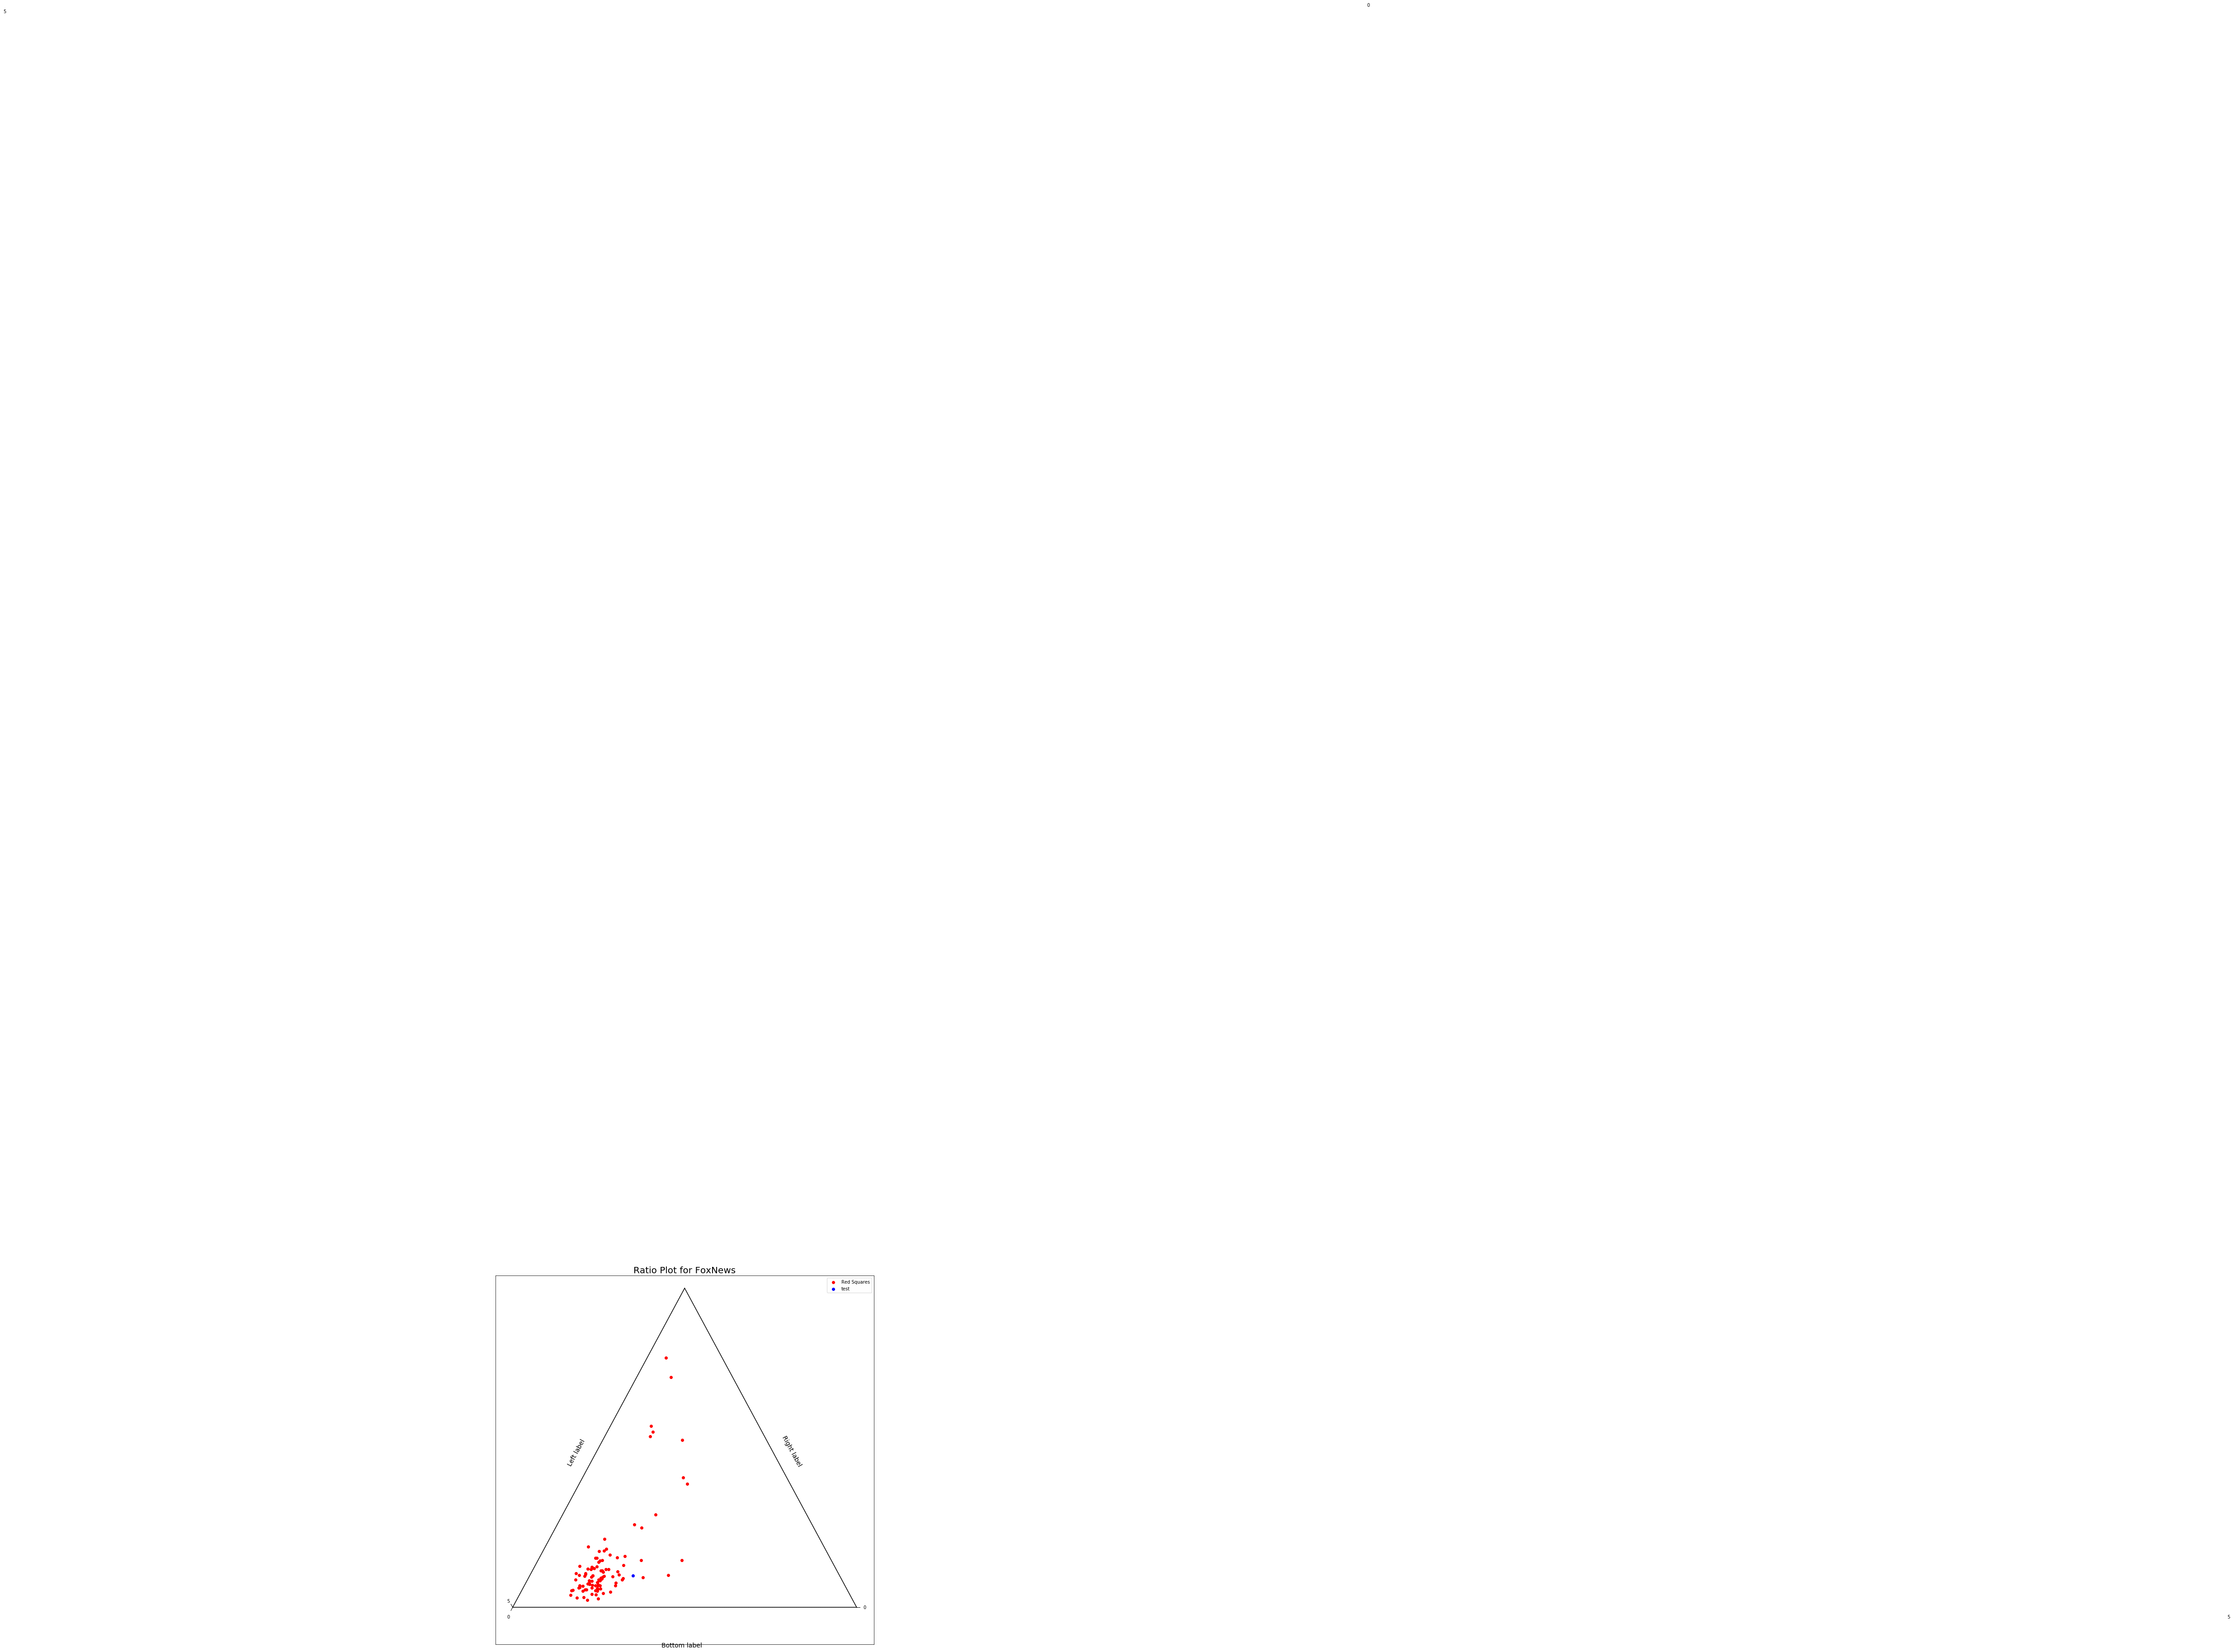

In [349]:
scale = 1

figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(15, 15)
# Set Axis labels and Title
tax.boundary(linewidth=1.5)
tax.gridlines(multiple=5, color="k")
tax.set_title("Ratio Plot for {}".format(screenname), fontsize=20)
tax.left_axis_label("Left label ", fontsize=14)
tax.right_axis_label("Right label ", fontsize=14)
tax.bottom_axis_label("Bottom label ", fontsize=14)

# Plot a few different styles with a legend
points = [i[0] for i in happ_tups]
tax.scatter(points, marker='o', color='red', label="Red Squares")
tax.scatter([(.3,.1,.6)],color='blue',label='test')
tax.legend()
tax.ticks(linewidth=1, multiple=5)
tax.clear_matplotlib_ticks()
tax.savefig('taxplot.pdf')
tax.show()

In [23]:
import pickle

In [31]:
file = open('ratiodictTheTweetOfGod.pkl',"rb")
ratiosGod = pickle.load(file)
ratiosGod = pd.DataFrame(ratiosGod).transpose()
ratiosGod
#ratiosGod.to_csv('ratios/{}-ratios.csv'.format('TheTweetOfGod'))



happ_score happ_words  likes replies retweets  \
974665705328005121     5.9214        365  11788     150     2730   
974713843166269441    6.08265        961  48473     621    10810   
974816867553439744    5.71957        951  38801     507     9619   
975360001148530688    6.02327        704  29989     647     4745   
975499246362226693    5.87378        715  28669    1.2K     4459   
975520659311812610    6.11292        706  13785     248     7876   
976069293493256192    5.70886        685  25188     671    11057   
976146312562327553    6.08077        443  10113     175     2478   
976559593261211648    6.11331        668  50321     493    12906   
976926745927475200    6.10006        644  26079     499     4374   
977019507645415425    5.69135        743   7261     567     6359   
977614088413921280    5.85253        718  35794     595     8801   
977619203032211456    5.78904        250   2643      84      576   
977638666179772416    5.75802        863  89391    1.4K    32542   
977952794618441728     5.9065        786  20349     722     4898   
978453176754913280    6.16128         47  19627     459     3998   
978680460535521281    5.98651        461  17669     235     3725   

                            scrape_date total_words  tweet_date  \
974665705328005121  2018-04-29_17_17_29        1253  2018-03-16   
974713843166269441  2018-04-29_17_16_06        3372  2018-03-16   
974816867553439744  2018-04-29_17_14_40        3176  2018-03-16   
975360001148530688  2018-04-29_17_13_14        2348  2018-03-18   
975499246362226693  2018-04-29_17_11_51        2868  2018-03-18   
975520659311812610  2018-04-29_17_10_27        2672  2014-03-29   
976069293493256192  2018-04-29_17_09_01        2232  2018-03-20   
976146312562327553  2018-04-29_17_07_37        1526  2018-03-20   
976559593261211648  2018-04-29_17_06_15        2288  2018-03-21   
976926745927475200  2018-04-29_17_04_52        2036  2018-03-22   
977019507645415425  2018-04-29_17_03_28        2805  2018-03-22   
977614088413921280  2018-04-29_17_02_03        2301  2018-03-24   
977619203032211456  2018-04-29_17_00_42         841  2018-03-24   
977638666179772416  2018-04-29_16_59_14        3121  2017-11-06   
977952794618441728  2018-04-29_16_57_45        2940  2018-03-25   
978453176754913280  2018-04-29_16_56_22         156  2018-03-26   
978680460535521281  2018-04-29_16_54_58        1569  2018-03-27   

                              tweet_id  \
974665705328005121  974665705328005121   
974713843166269441  974713843166269441   
974816867553439744  974816867553439744   
975360001148530688  975360001148530688   
975499246362226693  975499246362226693   
975520659311812610  975520659311812610   
976069293493256192  976069293493256192   
976146312562327553  976146312562327553   
976559593261211648  976559593261211648   
976926745927475200  976926745927475200   
977019507645415425  977019507645415425   
977614088413921280  977614088413921280   
977619203032211456  977619203032211456   
977638666179772416  977638666179772416   
977952794618441728  977952794618441728   
978453176754913280  978453176754913280   
978680460535521281  978680460535521281   

                                                                  url  
974665705328005121  http://twitter.com/TheTweetOfGod/status/974665...  
974713843166269441  http://twitter.com/TheTweetOfGod/status/974713...  
974816867553439744  http://twitter.com/TheTweetOfGod/status/974816...  
975360001148530688  http://twitter.com/TheTweetOfGod/status/975360...  
975499246362226693  http://twitter.com/TheTweetOfGod/status/975499...  
975520659311812610  http://twitter.com/TheTweetOfGod/status/975520...  
976069293493256192  http://twitter.com/TheTweetOfGod/status/976069...  
976146312562327553  http://twitter.com/TheTweetOfGod/status/976146...  
976559593261211648  http://twitter.com/TheTweetOfGod/status/976559...  
976926745927475200  http://twitter.com/TheTweetOfGod/status/976926...  
977019507645415425  http://twitter.com

In [75]:
ls

failedjsons/                      jsons/
finishedjsons/                    kanye-ratio-wordcount.png
geckodriver*                      ratios/
geckodriver-v0.20.1-macos.tar.gz  ratios_w_happ/
geckodriver.log                   screenshots/
getreplies_selenium.py            test_getreplies_selenium.py
getreplies_selenium_whapp.py      tests/
happ_vectors/                     tweet_convos/
happreplies.py


In [38]:
jfile = open('finishedjsons/tweetskanye.json')
jsontweets = []
for line in jfile:
    jsontweets.append(line)
    
failedtweets = ['989554444990738432']

In [40]:
if len(failedtweets) > 0:
    #failedfile = open('failedjsons/{}'.format('finishedjsons/tweetskanye.json'),'a+')
    for tweetid in failedtweets:
        for line in jsontweets:
            if tweetid in line:
                print(line)

{"user":{"screen_name": "kanyewest"},"id": 989554444990738432}



In [26]:
convo = 'tweet_convos-noratio/realDonaldTrump/2018-04-17_14_34-realDonaldTrump-986540431436640256-id-6.4K_15808_66892-tweetconvo-2018-04-28_21_06_18.txt'

In [28]:
import re
re.search('(?<=-tweetconvo-).*(?=.txt)',convo[-115:]).group(0)
re.search('(?<=/).*',convo[-115:]).group(0)[:10]

'2018-04-17'

In [10]:
len(convo)

106

In [4]:
import matplotlib.pyplot as plt
from scipy import linspace, polyval, polyfit, sqrt, stats, randn
ret = np.array([i for i in map(lambda x: x['retweets'], rawData)])
rep = np.array([i for i in map(lambda x: x['replies'], rawData)])
lik =  np.array([i for i in map(lambda x: x['likes'], rawData)])
hap =  np.array([i for i in map(lambda x: x['happ_score'], rawData)])
tw_id =  np.array([i for i in map(lambda x: x['user'], rawData)])

ratiom = rep/(rep+lik+ret)
hapm = hap

not_nan = np.array([np.logical_not(np.isnan(ratiom))])*np.array([np.logical_not(np.isnan(hapm))])

a_s,b_s,r,tt,stderr = stats.linregress(ratiom[not_nan[0]],hapm[not_nan[0]])


#compute the mean square error


print('Linear regression using polyfit')
print('regression: a=%.4f b=%.2f r= %.2f p = %.9e' % (a_s,b_s,r**2,tt))

#print(rawData)
print(np.argmax(lik/rep))
print(tw_id[np.argmax(lik/rep)])

plt.plot(ratiom,hap,'.')
plt.plot(ratiom,b_s+a_s*(ratiom),'r-', label = 'y= %.4fx +%.2f r^2= %.2f' % (a_s,b_s,r**2))
plt.title("reply/(reply+likes + retweet) vs happiness ")
plt.ylabel("happiness")
plt.xlabel("replies to replies + likes+ retweet")
plt.legend()
plt.show()

plt.semilogx(ratiom,hap,'.')
plt.semilogx(np.sort(ratiom),b_s+a_s*(np.sort(ratiom)),'r-')
plt.show()



NameError: name 'rawData' is not defined

Linear regression using polyfit
regression: a=-0.2190 b=5.57 r^2= 0.02
2985
SenSchumer


/Users/Winston/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning:

divide by zero encountered in true_divide

/Users/Winston/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning:

invalid value encountered in true_divide

/Users/Winston/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning:

divide by zero encountered in true_divide

/Users/Winston/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning:

invalid value encountered in true_divide



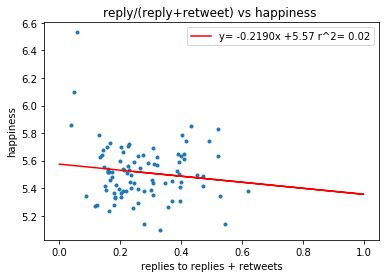

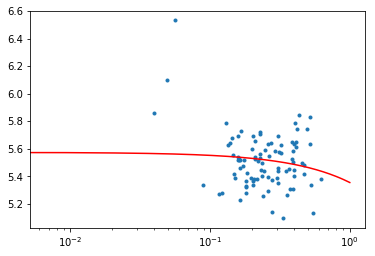

In [17]:
ratiom = rep/(rep+ret)

not_nan = np.array([np.logical_not(np.isnan(ratiom))])*np.array([np.logical_not(np.isnan(hapm))])

a_s,b_s,r,tt,stderr = stats.linregress(ratiom[not_nan[0]],hapm[not_nan[0]])


#compute the mean square error


print('Linear regression using polyfit')
print('regression: a=%.4f b=%.2f r^2= %.2f' % (a_s,b_s,r**2))

#print(rawData)
print(np.argmax(lik/rep))
print(tw_id[np.argmax(lik/rep)])

plt.plot(ratiom,hap,'.')
plt.plot(ratiom,b_s+a_s*(ratiom),'r-', label = 'y= %.4fx +%.2f r^2= %.2f' % (a_s,b_s,r**2))
plt.title("reply/(reply+retweet) vs happiness ")
plt.ylabel("happiness")
plt.xlabel("replies to replies + retweets")
plt.legend()
plt.show()

plt.semilogx(ratiom,hap,'.')
plt.semilogx(np.sort(ratiom),b_s+a_s*(np.sort(ratiom)),'r-')
plt.show()


Linear regression using polyfit
regression: a=-0.1137 b=5.55 r= 0.00
2985
SenSchumer


/Users/Winston/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning:

divide by zero encountered in true_divide

/Users/Winston/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning:

invalid value encountered in true_divide

/Users/Winston/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning:

divide by zero encountered in true_divide

/Users/Winston/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning:

invalid value encountered in true_divide



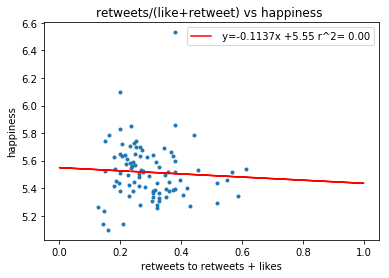

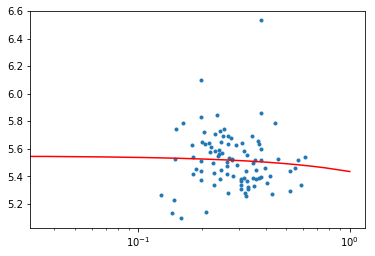

In [25]:
ratiom = ret/(lik+ret)

not_nan = np.array([np.logical_not(np.isnan(ratiom))])*np.array([np.logical_not(np.isnan(hapm))])

a_s,b_s,r,tt,stderr = stats.linregress(ratiom[not_nan[0]],hapm[not_nan[0]])


#compute the mean square error


print('Linear regression using polyfit')
print('regression: a=%.4f b=%.2f r= %.2f' % (a_s,b_s,r**2))

#print(rawData)
print(np.argmax(lik/rep))
print(tw_id[np.argmax(lik/rep)])

plt.plot(ratiom,hap,'.')
plt.plot(ratiom,b_s+a_s*(ratiom),'r-', label = ' y=%.4fx +%.2f r^2= %.2f' % (a_s,b_s,r**2))
plt.title("retweets/(like+retweet) vs happiness ")
plt.ylabel("happiness")
plt.xlabel("retweets to retweets + likes")
plt.legend()
plt.show()

plt.semilogx(ratiom,hap,'.')
plt.semilogx(np.sort(ratiom),b_s+a_s*(np.sort(ratiom)),'r-')
plt.show()


<IPython.core.display.Javascript object>


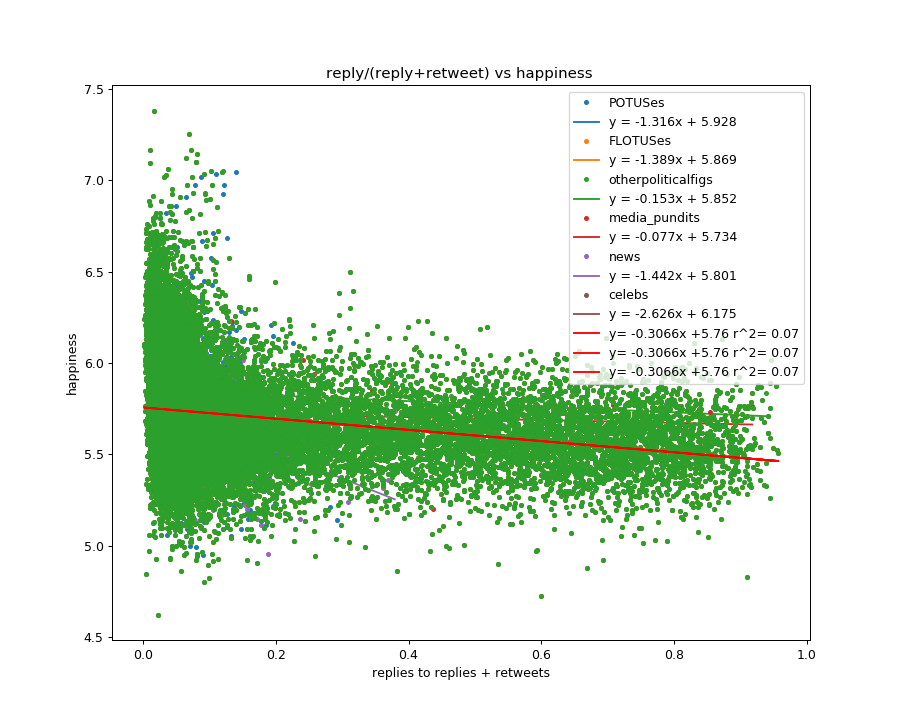

In [5]:
import matplotlib.pyplot as plt
from scipy import linspace, polyval, polyfit, sqrt, stats, randn
colors = ["#2078B5", "#FF7F0F", "#2CA12C", "#D72827", "#9467BE", "#8C574B",
            "#E478C2", "#808080", "#BCBE20", "#17BED0", "#AEC8E9", "#FFBC79", 
            "#98E08B", "#FF9896", "#C6B1D6", "#C59D94", "#F8B7D3", "#C8C8C8", 
           "#DCDC8E", "#9EDAE6"]

users = list(set(list(allratios['user'])))
POTUSes = ['BarackObama','BillClinton','realDonaldTrump','GeorgeHWBush','GeorgeWBush__','POTUS']
FLOTUSes = ['HillaryClinton','laurawbush','MichelleObama','MELANIATRUMP','FLOTUS']
otherpoliticalfigs = ['EPAScottPruitt','Comey','KellyannePolls','xychelsea','whca','VP','SenateGOP','HillaryClinton','laurawbush','MichelleObama','MELANIATRUMP','FLOTUS']
media_pundits = ['CillizzaCNN','KatyTurNBC','marcorubio','hughhewitt','SethAbramovitch','JackKingston','jimmyfallon','TheEllenShow','StephenAtHome']
news = ['BBCBreaking','FoxNews','cnnbrk']
celebs = ['Drake','KingJames','LilTunechi','kanyewest','iamcardib','MileyCyrus','taylorswift13','ladygaga','katyperry','chrissyteigen','ShaniaTwain','TheTweetOfGod','BillGates']

groups = [POTUSes,FLOTUSes,otherpoliticalfigs,media_pundits,news,celebs]#rappers,senators_D,senators_R,senators_I]
group_names = ['POTUSes','FLOTUSes','otherpoliticalfigs','media_pundits','news','celebs']#,'rappers','senators_D','senators_R','senators_I']
for i,g in enumerate(groups):
    groupdf = allratios.loc[[i for i in allratios.index if allratios.loc[i,'user'] in g],:]
    groupdf['group'] = group_names[i]
    allratios.update(groupdf)


plt.figure(figsize=(10,8))
for i,g in enumerate(groups):
    ret = []
    rep = []
    lik = []
    hap = []
    for u in g:
        
        if u in users:
            allratios_user = allratios[allratios.user == u]
            
            
            ratio_retweet = list(allratios_user['norm_retweets'])
            ratio_replies = list(allratios_user['norm_replies'])
            ratio_likes = list(allratios_user['norm_likes'])
            ratio_hap = list(allratios_user['happ_score'])
            
        
            ret.append(ratio_retweet)
            rep.append(ratio_replies)
            lik.append(ratio_likes)
            hap.append(ratio_hap)
    ret = np.array(ret[0])
    rep = np.array(rep[0])
    lik = np.array(lik[0])
    hap = np.array(hap[0])
    
    ratiom = rep/(lik+rep)
    
    not_nan = np.array([np.logical_not(np.isnan(ratiom))])*np.array([np.logical_not(np.isnan(hap))])
    
    
    
    
    a_s,b_s,r,tt,stderr = stats.linregress(ratiom[not_nan[0]],hap[not_nan[0]])

    a_s,b_s,r,tt,stderr = stats.linregress(ratiom[not_nan[0]],hap[not_nan[0]])
    
    
    plt.plot(ratiom,hap,'.',color = colors[i],label = group_names[i])
    plt.plot(np.sort(ratiom),a_s*np.sort(ratiom)+b_s,color = colors[i],label = "y = %.3fx + %.3f"%(a_s,b_s))
plt.legend(bbox_to_anchor= (1.2,1))
plt.show()

In [23]:
ret = allratios['retweets'].values
rep =  allratios['replies'].values
lik =  allratios['likes'].values
hap =  allratios['happ_score'].values
tw_id =  allratios['user'].values
print(ret[10])
ratiom = rep/(rep+ret+lik)




not_nan = np.logical_not(pd.isnull(ratiom))*np.logical_not(pd.isnull(hap))
print()

ratiom = ratiom[not_nan].astype("float32")
hap = hap[not_nan].astype("float32")
a_s,b_s,r,tt,stderr = stats.linregress(ratiom,hap)


#compute the mean square error


print('Linear regression using polyfit')
print('regression: a=%.4f b=%.2f r^2= %.2f' % (a_s,b_s,r**2))

#print(rawData)
print(np.argmax(lik/rep))
print(tw_id[np.argmax(lik/rep)])

plt.plot(ratiom,hap,'.')
plt.plot(ratiom,b_s+a_s*(ratiom),'r-', label = 'y= %.4fx +%.2f r^2= %.2f' % (a_s,b_s,r**2))
plt.title("reply/(reply+retweet) vs happiness ")
plt.ylabel("happiness")
plt.xlabel("replies to replies + retweets")
plt.legend()
plt.show()

1360

Linear regression using polyfit
regression: a=-0.3066 b=5.76 r^2= 0.07
19322
iamcardib


In [24]:
import pymc3 as pm

with pm.Model() as tweet_model:
    switchpoint = pm.Uniform('switchpoint', lower=ratiom.min(), upper=ratiom.max(), testval=0.01)
    m1 = pm.Uniform('m1', -2,2)
    m2 = pm.Uniform('m2', -2,2)
    b1 = pm.Uniform("b1",-2,10)
    b2 = pm.Uniform('b2',-3,10)
    sigma = pm.HalfNormal('sigma', sd=1)
    
    mu1 = b1 + m1 * ratiom
    mu2 = b2 + m2 * ratiom
    # Allocate appropriate Poisson rates to years before and after current
    ratio_fit = pm.math.switch(switchpoint >= ratiom, mu1, mu2)

    tweets = pm.Normal('tweets', mu = ratio_fit, sd=sigma, observed=hap)

In [ ]:
import pymc3 as pm

with pm.Model() as tweet_model:
    switchpoint = pm.Uniform('switchpoint', lower=ratiom.min(), upper=ratiom.max(), testval=0.01)
    m1 = pm.Uniform('m1', -2,2)
    m2 = pm.Uniform('m2', -2,2)
    b1 = pm.Uniform("b1",-2,10)
    b2 = pm.Uniform('b2',-3,10)
    sigma1 = pm.HalfNormal('sigma1', sd=1)
    sigma2 = pm.HalfNormal('sigma2', sd=1)

    
    mu1 = b1 + m1 * ratiom
    mu2 = b2 + m2 * ratiom
    
    
    tweets1 = pm.Normal('tweets1', mu = mu1, sd=sigma1, observed=hap)
    tweets2 = pm.Normal('tweets2', mu = mu2, sd=sigma2, observed=hap)
    # Allocate appropriate Poisson rates to years before and after current
    ratio_fit = pm.math.switch(switchpoint >= ratiom, tweets1, tweets2)



In [27]:
with tweet_model:
    trace = pm.sample(1000,init='advi')

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using advi...
INFO:pymc3:Initializing NUTS using advi...
Average Loss = 2,385.2:  12%|█▏        | 23477/200000 [00:43<05:29, 535.22it/s]  
Convergence archived at 23500
INFO:pymc3.variational.inference:Convergence archived at 23500
Interrupted at 23,499 [11%]: Average Loss = 36,139
INFO:pymc3.variational.inference:Interrupted at 23,499 [11%]: Average Loss = 36,139
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_log__, b2_interval__, b1_interval__, m2_interval__, m1_interval__, switchpoint_interval__]
INFO:pymc3:NUTS: [sigma_log__, b2_interval__, b1_interval__, m2_interval__, m1_interval__, switchpoint_interval__]
100%|██████████| 1500/1500 [39:53<00:00,  1.60s/it]
/Users/Winston/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.co

/Users/Winston/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120c5dba8>,
      dtype=object)

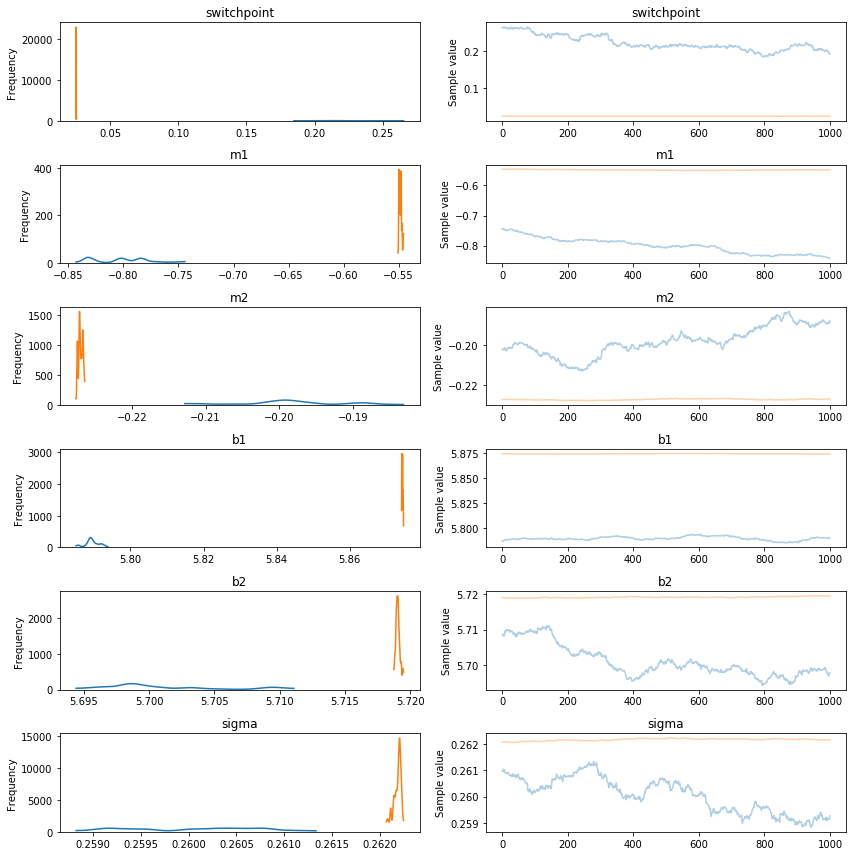

In [29]:
%matplotlib inline
pm.traceplot(trace)

<IPython.core.display.Javascript object>


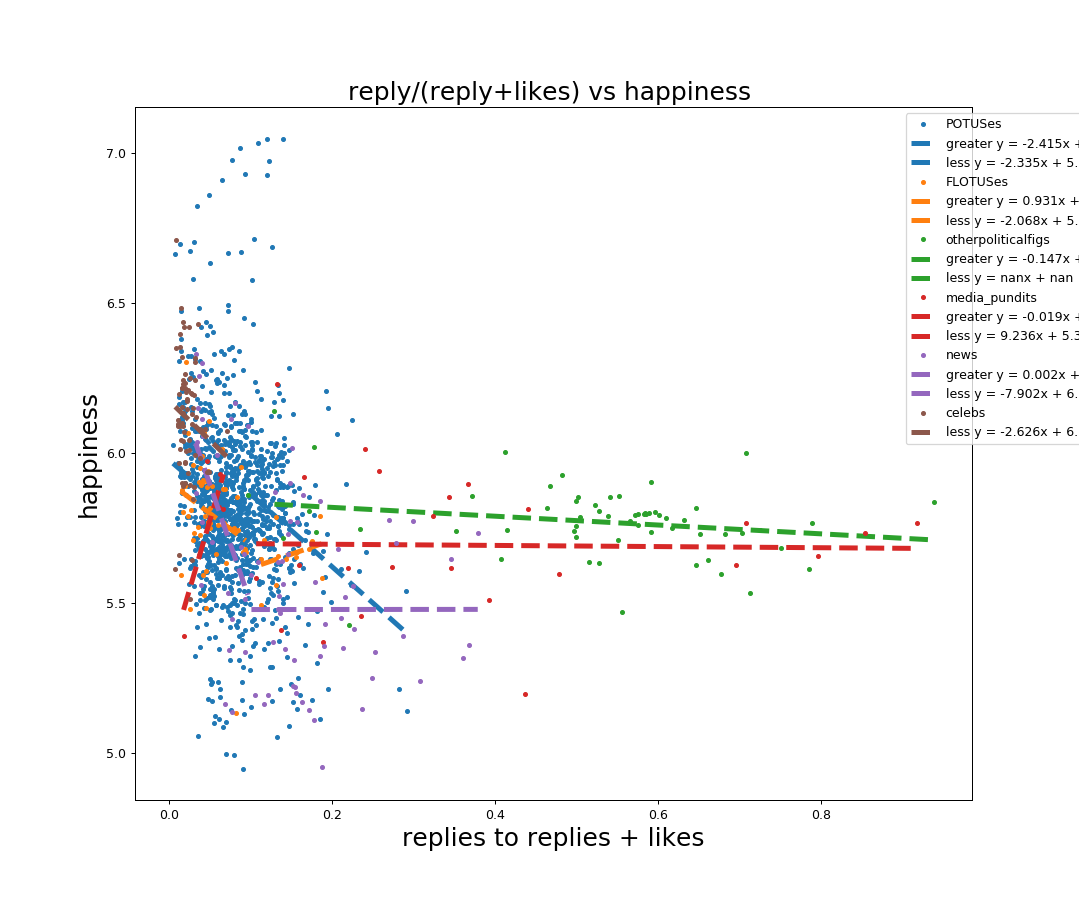

/Users/Winston/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:106: RuntimeWarning:

invalid value encountered in double_scalars

/Users/Winston/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:116: RuntimeWarning:

invalid value encountered in sqrt

/Users/Winston/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:118: RuntimeWarning:

invalid value encountered in double_scalars



In [10]:
plt.figure(figsize=(12,10))
for i,g in enumerate(groups):
    ret = []
    rep = []
    lik = []
    hap = []
    for u in g:
        
        if u in users:
            allratios_user = allratios[allratios.user == u]
            
            
            ratio_retweet = list(allratios_user['norm_retweets'])
            ratio_replies = list(allratios_user['norm_replies'])
            ratio_likes = list(allratios_user['norm_likes'])
            ratio_hap = list(allratios_user['happ_score'])
            
        
            ret.append(ratio_retweet)
            rep.append(ratio_replies)
            lik.append(ratio_likes)
            hap.append(ratio_hap)
    ret = np.array(ret[0])
    rep = np.array(rep[0])
    lik = np.array(lik[0])
    hap = np.array(hap[0])
    
    ratiom = rep/(lik+rep)
    
    not_nan = np.array([np.logical_not(np.isnan(ratiom))])*np.array([np.logical_not(np.isnan(hap))])
    
    ratiom = ratiom[not_nan[0]]
    hap = hap[not_nan[0]]
    
    plt.plot(ratiom,hap,'.',color = colors[i],label = group_names[i])
    
    if hap[ratiom > 0.1].size > 0 and ratiom[ratiom > 0.1].size > 0:
    
        a_1,b_1,r1,tt1,stderr1 = stats.linregress(ratiom[ratiom > 0.1],hap[ratiom > 0.1])
        plt.plot(np.sort(ratiom[ratiom > 0.1]),a_1*np.sort(ratiom[ratiom > 0.1])+b_1,lw=4,ls = "--",color = colors[i],label = "greater y = %.3fx + %.3f "%(a_1,b_1))
    if hap[ratiom <= 0.1].size > 0 and ratiom[ratiom <= 0.1].size > 0: 
        a_s,b_s,r,tt,stderr = stats.linregress(ratiom[ratiom <= 0.1],hap[ratiom <= 0.1])
        plt.plot(np.sort(ratiom[ratiom <= 0.1]),a_s*np.sort(ratiom[ratiom <= 0.1])+b_s,lw = 4,ls = "--",color = colors[i],label = "less y = %.3fx + %.3f"%(a_s,b_s))
    

plt.legend(bbox_to_anchor= (1.2,1))
plt.title("reply/(reply+likes) vs happiness ",fontsize=20)
plt.ylabel("happiness",fontsize=20)
plt.xlabel("replies to replies + likes",fontsize=20)
plt.show()




<IPython.core.display.Javascript object>


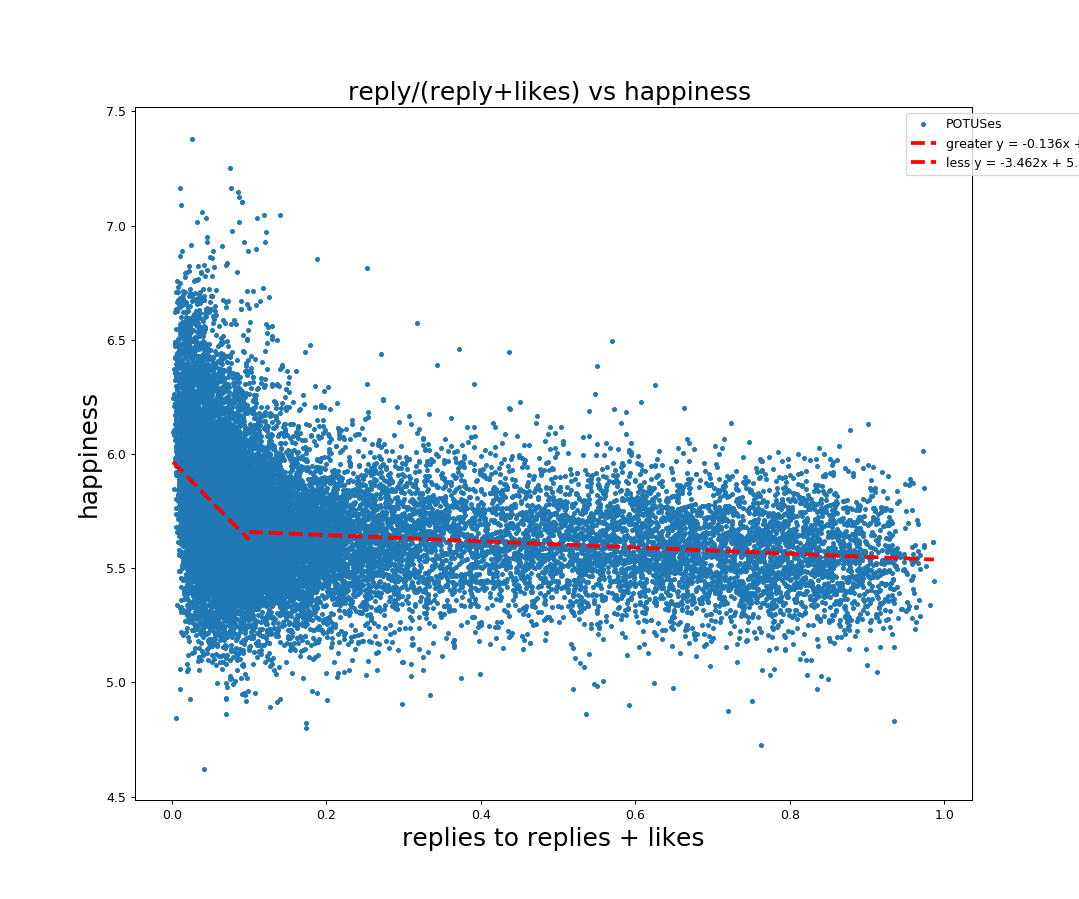

In [11]:
plt.figure(figsize=(12,10))
ret = allratios['retweets'].values
rep =  allratios['replies'].values
lik =  allratios['likes'].values
hap =  allratios['happ_score'].values

ratiom = rep/(lik+rep)

not_nan = np.logical_not(pd.isnull(ratiom))*np.logical_not(pd.isnull(hap))

i =0    
plt.plot(ratiom,hap,'.',color = colors[i],label = group_names[i])

ratiom = ratiom[not_nan].astype("float32")
hap = hap[not_nan].astype("float32")    
if hap[ratiom > 0.1].size > 0 and ratiom[ratiom > 0.1].size > 0:

    a_1,b_1,r1,tt1,stderr1 = stats.linregress(ratiom[ratiom > 0.1],hap[ratiom > 0.1])
    plt.plot(np.sort(ratiom[ratiom > 0.1]),a_1*np.sort(ratiom[ratiom > 0.1])+b_1,"r--",lw=3,label = "greater y = %.3fx + %.3f "%(a_1,b_1))
if hap[ratiom <= 0.1].size > 0 and ratiom[ratiom <= 0.1].size > 0: 
    a_s,b_s,r,tt,stderr = stats.linregress(ratiom[ratiom <= 0.1],hap[ratiom <= 0.1])
    plt.plot(np.sort(ratiom[ratiom <= 0.1]),a_s*np.sort(ratiom[ratiom <= 0.1])+b_s,"r--",lw=3,label = "less y = %.3fx + %.3f"%(a_s,b_s))


plt.legend(bbox_to_anchor= (1.2,1))
plt.title("reply/(reply+likes) vs happiness ",fontsize=20)
plt.ylabel("happiness",fontsize=20)
plt.xlabel("replies to replies + likes",fontsize=20)
plt.show()




<IPython.core.display.Javascript object>


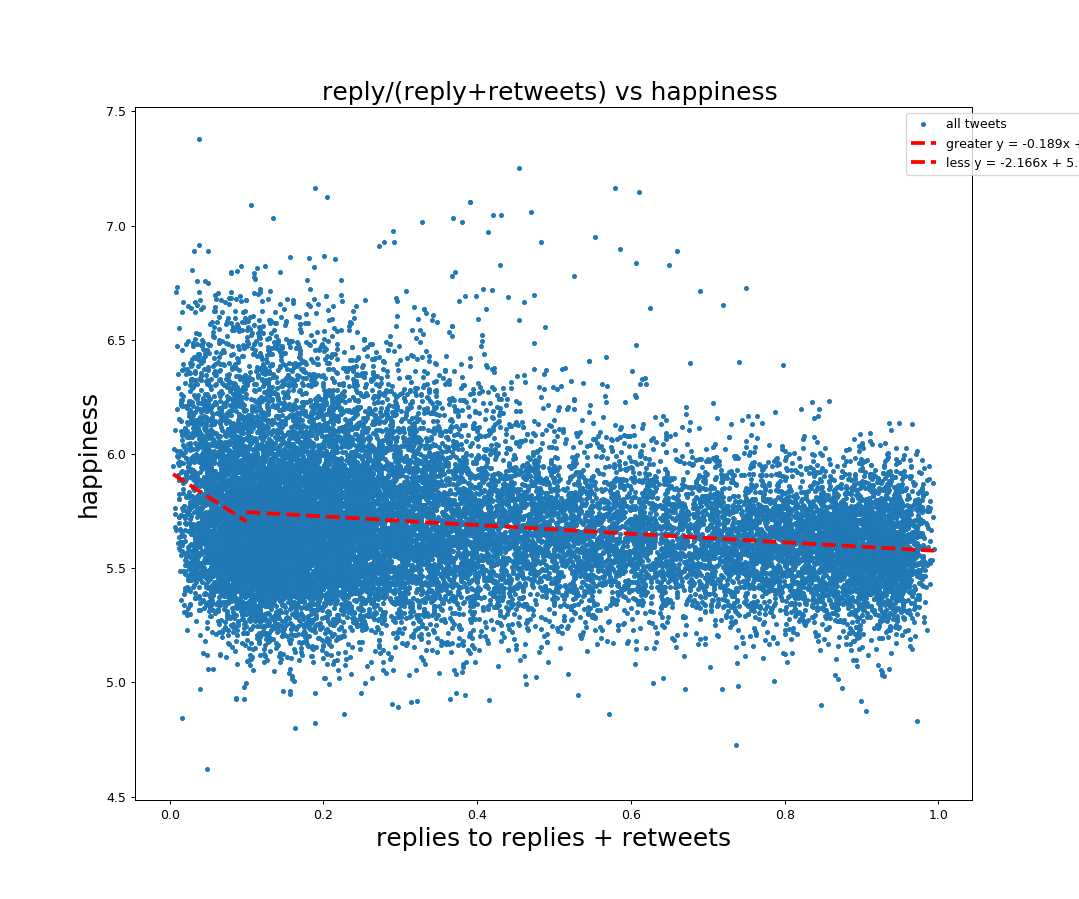

In [12]:
plt.figure(figsize=(12,10))
ret = allratios['retweets'].values
rep =  allratios['replies'].values
lik =  allratios['likes'].values
hap =  allratios['happ_score'].values

ratiom = rep/(rep+ret)

not_nan = np.logical_not(pd.isnull(ratiom))*np.logical_not(pd.isnull(hap))

i =0    
plt.plot(ratiom,hap,'.',color = colors[i],label = "all tweets")

ratiom = ratiom[not_nan].astype("float32")
hap = hap[not_nan].astype("float32")    
if hap[ratiom > 0.1].size > 0 and ratiom[ratiom > 0.1].size > 0:

    a_1,b_1,r1,tt1,stderr1 = stats.linregress(ratiom[ratiom > 0.1],hap[ratiom > 0.1])
    plt.plot(np.sort(ratiom[ratiom > 0.1]),a_1*np.sort(ratiom[ratiom > 0.1])+b_1,"r--",lw=3,label = "greater y = %.3fx + %.3f "%(a_1,b_1))
if hap[ratiom <= 0.1].size > 0 and ratiom[ratiom <= 0.1].size > 0: 
    a_s,b_s,r,tt,stderr = stats.linregress(ratiom[ratiom <= 0.1],hap[ratiom <= 0.1])
    plt.plot(np.sort(ratiom[ratiom <= 0.1]),a_s*np.sort(ratiom[ratiom <= 0.1])+b_s,"r--",lw=3,label = "less y = %.3fx + %.3f"%(a_s,b_s))

plt.legend(bbox_to_anchor= (1.2,1))
plt.title("reply/(reply+retweets) vs happiness ",fontsize=20)
plt.ylabel("happiness",fontsize=20)
plt.xlabel("replies to replies + retweets",fontsize=20)
plt.show()




<Figure size 864x720 with 0 Axes>

/Users/Winston/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



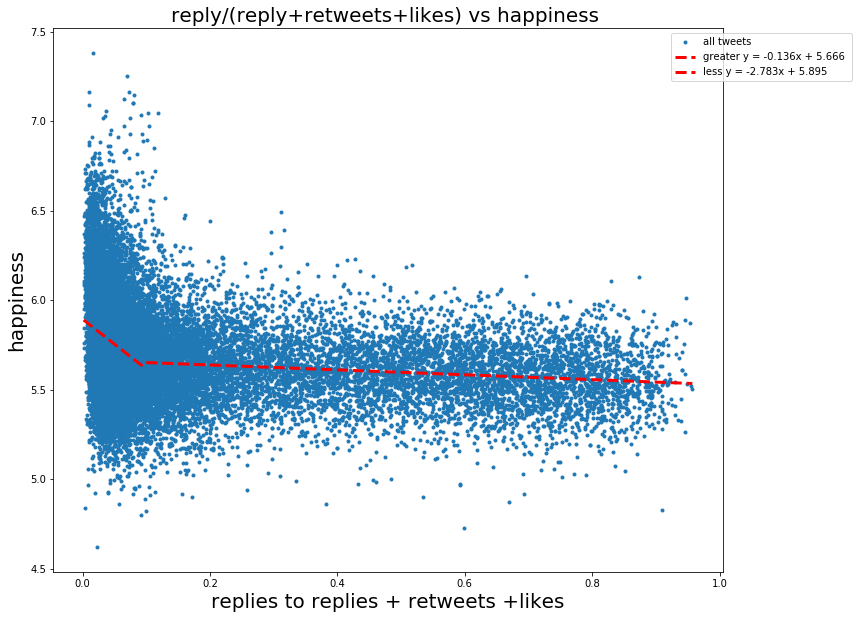

In [25]:
plt.figure(figsize=(12,10))
ret = allratios['retweets'].values
rep =  allratios['replies'].values
lik =  allratios['likes'].values
hap =  allratios['happ_score'].values

ratiom = rep/(rep+ret+lik)

not_nan = np.logical_not(pd.isnull(ratiom))*np.logical_not(pd.isnull(hap))

i =0    
plt.plot(ratiom,hap,'.',color = colors[i],label = "all tweets")

ratiom = ratiom[not_nan].astype("float32")
hap = hap[not_nan].astype("float32")    
if hap[ratiom > 0.1].size > 0 and ratiom[ratiom > 0.1].size > 0:

    a_1,b_1,r1,tt1,stderr1 = stats.linregress(ratiom[ratiom > 0.1],hap[ratiom > 0.1])
    plt.plot(np.sort(ratiom[ratiom > 0.1]),a_1*np.sort(ratiom[ratiom > 0.1])+b_1,"r--",lw=3,label = "greater y = %.3fx + %.3f "%(a_1,b_1))
if hap[ratiom <= 0.1].size > 0 and ratiom[ratiom <= 0.1].size > 0: 
    a_s,b_s,r,tt,stderr = stats.linregress(ratiom[ratiom <= 0.1],hap[ratiom <= 0.1])
    plt.plot(np.sort(ratiom[ratiom <= 0.1]),a_s*np.sort(ratiom[ratiom <= 0.1])+b_s,"r--",lw=3,label = "less y = %.3fx + %.3f"%(a_s,b_s))

plt.legend(bbox_to_anchor= (1.2,1))
plt.title("reply/(reply+retweets+likes) vs happiness ",fontsize=20)
plt.ylabel("happiness",fontsize=20)
plt.xlabel("replies to replies + retweets +likes",fontsize=20)
plt.show()




In [ ]:
import pymc3 as pm

with pm.Model() as tweet_model:
    switchpoint = pm.DiscreteUniform('switchpoint', lower=year.min(), upper=year.max(), testval=1900)


In [ ]:
##### %matplotlib inline
import pymc3 as pm
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2')



In [92]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=2)
    sigma = pm.HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [93]:

map_estimate = pm.find_MAP(model=basic_model)

map_estimate

logp = -149.58, ||grad|| = 12.242: 100%|██████████| 19/19 [00:00<00:00, 169.78it/s] 


{'alpha': array(0.90660093),
 'beta': array([0.94848596, 2.60711845]),
 'sigma': array(0.96298858),
 'sigma_log__': array(-0.03771373)}

In [ ]:
            avgratio_retweet = np.nanmean(list(allratios_user['norm_retweets']))
            avgratio_replies = np.nanmean(list(allratios_user['norm_replies']))
            avgratio_likes = np.nanmean(list(allratios_user['norm_likes']))
            totinteraction = sum(list(allratios_user['replies'])) + sum(list(allratios_user['retweets'])) + sum(list(allratios_user['likes']))
            avgtotal = np.nanmean([allratios_user.loc[i,'replies'] + allratios_user.loc[i,'retweets'] + allratios_user.loc[i,'likes'] for i in allratios_user.index])
            avgretweets = avgratio_retweet*avgtotal #np.mean(list(allratios_user['retweets']))
            avgreplies = avgratio_replies*avgtotal  #np.mean(list(allratios_user['replies']))
            avglikes = avgratio_likes*avgtotal      #np.mean(list(allratios_user['likes']))
            numtweets = len(allratios_user.index)
            data['a'].append(avgratio_retweet)
            data['b'].append(avgratio_replies)
            data['c'].append(avgratio_likes)
            avghappscore = np.nanmean(list(allratios_user['happ_score']))
            data['text'].append(u +
                                   "'s <br>avg. happiness = " +
                                   str(round(avghappscore,3)) +
                                   '<br>average ratio:<br>retweets = ' +
                                   str(int(avgretweets)) + 
                                   '<br>replies = ' +
                                   str(int(avgreplies)) + 
                                   '<br>likes = ' +
                                   str(int(avglikes)) + 
                                   '<br># tweets looked at = ' +
                                   str(int(numtweets))
                                )
            data['marker']['color'].append(avghappscore)
            data['marker']['size'].append(1+np.log(totinteraction/numtweets))

In [41]:
print(lik)

[8.123261 8.123261 8.123261 ... 8.123261 8.051023 8.123261]


<IPython.core.display.Javascript object>


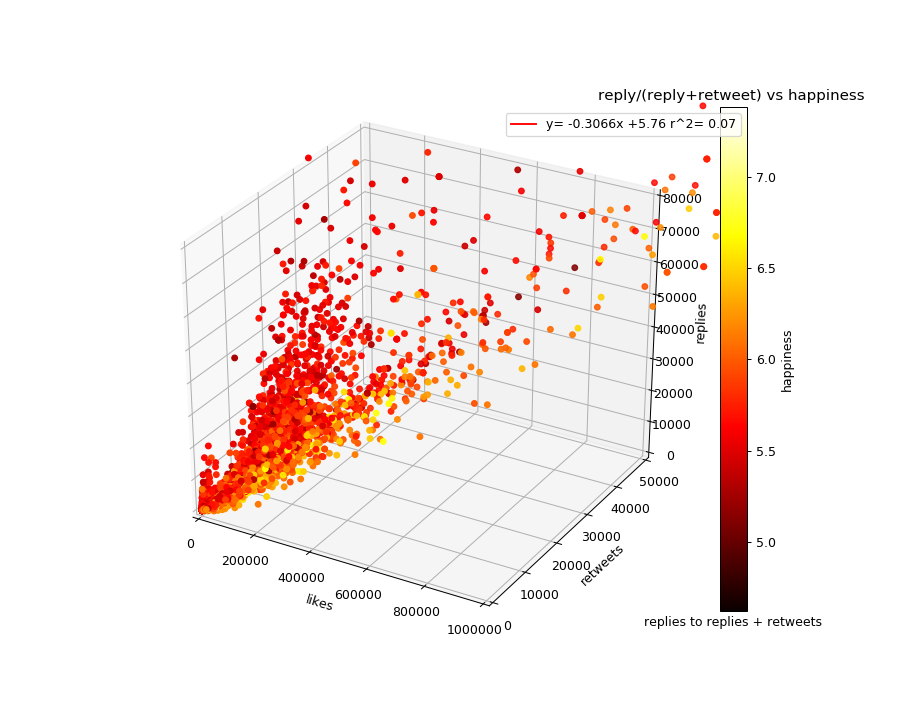

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ret = allratios['retweets'].values
rep =  allratios['replies'].values
lik =  allratios['likes'].values
hap =  allratios['happ_score'].values



not_nan = np.logical_not(pd.isnull(ret))*np.logical_not(pd.isnull(hap))*np.logical_not(pd.isnull(rep))**np.logical_not(pd.isnull(lik))

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
im = ax.scatter(lik,ret,rep,cmap = 'hot',c=hap)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.8, 0.15, 0.03, 0.7])
fig.colorbar(im, cax=cbar_ax)
ax.set_xlabel("likes")
ax.set_ylabel("retweets")
ax.set_zlabel('replies')
ax.set_xlim([0,1000000])
ax.set_ylim([0,50000])
ax.set_zlim([0,80000])
plt.show()